In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models
import cv2 

2025-12-09 10:29:37.164500: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-12-09 10:29:37.174666: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-12-09 10:29:37.588314: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-12-09 10:29:39.522510: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off,

In [2]:
import pathlib
data_path = '/home/pradumansingh/Desktop/Learning/Deep learning/datasets/flower_photos/flower_photos'
data_dir = pathlib.Path(data_path)
print(data_dir)
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)


/home/pradumansingh/Desktop/Learning/Deep learning/datasets/flower_photos/flower_photos
3670


In [3]:
rose_list = list(data_dir.glob('roses/*'))
rose_list[:5]

[PosixPath('/home/pradumansingh/Desktop/Learning/Deep learning/datasets/flower_photos/flower_photos/roses/15750320284_22ef21c682.jpg'),
 PosixPath('/home/pradumansingh/Desktop/Learning/Deep learning/datasets/flower_photos/flower_photos/roses/3026375835_a20ecdd140_m.jpg'),
 PosixPath('/home/pradumansingh/Desktop/Learning/Deep learning/datasets/flower_photos/flower_photos/roses/5578766623_542c91dfaa_n.jpg'),
 PosixPath('/home/pradumansingh/Desktop/Learning/Deep learning/datasets/flower_photos/flower_photos/roses/9458445402_79e4dfa89c.jpg'),
 PosixPath('/home/pradumansingh/Desktop/Learning/Deep learning/datasets/flower_photos/flower_photos/roses/4242976586_607a8f9843_n.jpg')]

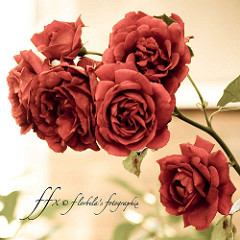

In [4]:
PIL.Image.open(rose_list[1])


In [5]:
flower_image_dict = {
    "roses": list(data_dir.glob('roses/*')),
    "tulips": list(data_dir.glob('tulips/*')),
    "daisy": list(data_dir.glob('daisy/*')),
    "sunflowers": list(data_dir.glob('sunflowers/*')),
    "dandelion": list(data_dir.glob('dandelion/*'))
}

In [6]:
flower_label_dict = {
    "roses" : 0,
    "tulips": 1,
    "daisy":2,
    "sunflowers" : 3,
    "dandelion": 4
}
flower_label_dict["roses"]

0

In [7]:
flower_image_dict["roses"][0]

PosixPath('/home/pradumansingh/Desktop/Learning/Deep learning/datasets/flower_photos/flower_photos/roses/15750320284_22ef21c682.jpg')

In [8]:
img = cv2.imread(flower_image_dict["roses"][1])
img.shape

(240, 240, 3)

In [9]:
cv2.resize(img, (180, 180)).shape
img[0]

array([[255, 255, 255],
       [255, 255, 255],
       [255, 255, 255],
       [255, 255, 255],
       [255, 255, 255],
       [255, 255, 255],
       [255, 255, 255],
       [255, 255, 255],
       [255, 255, 255],
       [255, 255, 255],
       [255, 255, 255],
       [255, 255, 255],
       [255, 255, 255],
       [255, 255, 255],
       [255, 255, 255],
       [255, 255, 255],
       [255, 255, 255],
       [255, 255, 255],
       [255, 255, 255],
       [255, 255, 255],
       [255, 255, 255],
       [255, 255, 255],
       [255, 255, 255],
       [255, 255, 255],
       [249, 255, 254],
       [249, 255, 254],
       [249, 255, 254],
       [249, 255, 254],
       [249, 255, 254],
       [248, 254, 253],
       [247, 253, 252],
       [247, 253, 252],
       [242, 254, 255],
       [238, 249, 253],
       [232, 246, 252],
       [228, 243, 252],
       [226, 240, 252],
       [223, 239, 251],
       [225, 241, 253],
       [229, 243, 255],
       [231, 247, 254],
       [231, 247

In [10]:
X , y = [] , []

for flower_name, images in flower_image_dict.items():
    for image in images:
        img = cv2.imread(image)
        resized_image = cv2.resize(img, (180, 180))
        
        X.append(resized_image)
        y.append(flower_label_dict[flower_name])


In [11]:
X = np.array(X)
y = np.array(y)

X[0]

array([[[200, 159, 139],
        [201, 161, 134],
        [161, 162, 183],
        ...,
        [235, 252, 171],
        [229, 253, 156],
        [235, 248, 249]],

       [[201, 160, 139],
        [201, 161, 134],
        [159, 161, 180],
        ...,
        [246, 252, 243],
        [241, 248, 203],
        [234, 235, 247]],

       [[204, 163, 141],
        [200, 160, 132],
        [156, 158, 178],
        ...,
        [253, 253, 239],
        [243, 253, 219],
        [248, 254, 249]],

       ...,

       [[163, 128, 114],
        [166, 134, 118],
        [159, 129, 115],
        ...,
        [123,  96,  82],
        [115,  89,  74],
        [120,  93,  77]],

       [[162, 129, 111],
        [162, 124, 108],
        [161, 119, 107],
        ...,
        [113,  87,  71],
        [109,  83,  68],
        [117,  91,  75]],

       [[160, 128, 117],
        [172, 149, 138],
        [178, 162, 159],
        ...,
        [125,  97,  80],
        [122,  94,  77],
        [119,  92,  76]]

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [13]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

X_train_scaled[0]

array([[[0.00392157, 0.07843137, 0.03921569],
        [0.00392157, 0.08235294, 0.03529412],
        [0.        , 0.09019608, 0.03529412],
        ...,
        [0.81960784, 0.78431373, 0.72941176],
        [0.81960784, 0.78431373, 0.73333333],
        [0.82352941, 0.78823529, 0.7372549 ]],

       [[0.01176471, 0.08235294, 0.03921569],
        [0.01568627, 0.08627451, 0.04313725],
        [0.00784314, 0.09019608, 0.04313725],
        ...,
        [0.82745098, 0.78823529, 0.73333333],
        [0.82745098, 0.78823529, 0.7372549 ],
        [0.83137255, 0.78823529, 0.74117647]],

       [[0.00784314, 0.0745098 , 0.03137255],
        [0.01568627, 0.08235294, 0.03921569],
        [0.01960784, 0.08627451, 0.04313725],
        ...,
        [0.83921569, 0.79215686, 0.7372549 ],
        [0.83921569, 0.78823529, 0.74117647],
        [0.84313725, 0.79215686, 0.74509804]],

       ...,

       [[0.00392157, 0.05098039, 0.02352941],
        [0.00392157, 0.05098039, 0.02352941],
        [0.00784314, 0

In [14]:
models = tf.keras.models.Sequential([
    layers.Conv2D(16, 3, padding="same", activation="relu" ),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding="same", activation="relu" ),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding="same", activation="relu" ),
    layers.MaxPooling2D(),
    layers.Conv2D(128, 3, padding="same", activation="relu" ),
    layers.MaxPooling2D(),
    layers.Conv2D(128, 3, padding="same", activation="relu" ),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding="same", activation="relu" ),
    layers.MaxPooling2D(),
    # flatting
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(5 , activation="softmax")
])

models.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

2025-12-09 10:29:45.562584: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [15]:
models.fit(X_train_scaled, y_train, epochs=30)

Epoch 1/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 21s 219ms/step - accuracy: 0.3067 - loss: 1.5383
Epoch 2/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 18s 213ms/step - accuracy: 0.4052 - loss: 1.3547
Epoch 3/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 19s 220ms/step - accuracy: 0.5385 - loss: 1.1143
Epoch 4/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 19s 216ms/step - accuracy: 0.6225 - loss: 0.9143
Epoch 5/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 18s 212ms/step - accuracy: 0.6453 - loss: 0.8705
Epoch 6/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 18s 213ms/step - accuracy: 0.6955 - loss: 0.7670
Epoch 7/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 18s 213ms/step - accuracy: 0.7126 - loss: 0.7129
Epoch 8/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 18s 213ms/step - accuracy: 0.7409 - loss: 0.6418
Epoch 9/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 18s 210ms/step - accuracy: 0.7500 - loss: 0.6322
Epoch 10/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 18s 210ms/step - accuracy: 0.7831 - loss: 0.5424
Epoch 11/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 18s 212ms/step - accuracy: 0.8161 - loss: 0.4796
Epoch 12/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 19

In [16]:
models.evaluate(X_test_scaled, y_test)

29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - accuracy: 0.7113 - loss: 1.7955


[1.7954586744308472, 0.7113289833068848]

In [20]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal", input_shape=(180, 180, 3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

/home/pradumansingh/Desktop/Learning/Deep learning/.venv/lib/python3.12/site-packages/keras/src/layers/preprocessing/data_layer.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [26]:
models1 = tf.keras.models.Sequential([
    data_augmentation,
    layers.Conv2D(16, 3, padding="same", activation="relu" ),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding="same", activation="relu" ),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding="same", activation="relu" ),
    layers.MaxPooling2D(),
    layers.Conv2D(128, 3, padding="same", activation="relu" ),
    
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    # flatting
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(5 , activation="softmax")
])

models1.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [27]:
models1.fit(X_train_scaled, y_train, epochs=30)

Epoch 1/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 18s 193ms/step - accuracy: 0.4564 - loss: 1.2463
Epoch 2/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 21s 243ms/step - accuracy: 0.5938 - loss: 1.0312
Epoch 3/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 21s 242ms/step - accuracy: 0.6344 - loss: 0.9076
Epoch 4/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 21s 241ms/step - accuracy: 0.6602 - loss: 0.8576
Epoch 5/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 21s 241ms/step - accuracy: 0.6795 - loss: 0.7995
Epoch 6/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 21s 245ms/step - accuracy: 0.7137 - loss: 0.7529
Epoch 7/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 22s 250ms/step - accuracy: 0.7173 - loss: 0.7158
Epoch 8/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 21s 245ms/step - accuracy: 0.7300 - loss: 0.6823
Epoch 9/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 22s 255ms/step - accuracy: 0.7322 - loss: 0.6717
Epoch 10/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 22s 250ms/step - accuracy: 0.7562 - loss: 0.6370
Epoch 11/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 21s 246ms/step - accuracy: 0.7627 - loss: 0.6211
Epoch 12/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 20

In [28]:
models1.evaluate(X_test_scaled, y_test)

29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - accuracy: 0.7342 - loss: 0.9466


[0.9466404318809509, 0.7342047691345215]